## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import os

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()
data_dir = '../dataset'

for a in assets:
#     pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']
    pf_data[a] = pd.read_csv(os.path.join(data_dir, a+'.csv'), index_col=0)['Adj Close']
pf_data

,WMT,FB
Date,,
2014-01-02,78.910004,54.709999
2014-01-03,78.650002,54.560001
2014-01-06,78.209999,57.200001
2014-01-07,78.449997,57.919998
2014-01-08,77.830002,58.230000
2014-01-09,78.089996,57.220001
2014-01-10,78.040001,57.939999
2014-01-13,77.489998,55.910000
2014-01-14,77.959999,57.740002


In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.55636968,  0.44363032])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [3]:
np.sum(weights * log_returns.mean()) * 250

0.11411885594024074

Expected Portfolio Variance:

In [4]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.030469646599336854

Expected Portfolio Volatility:

In [5]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.17455556880070269

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [6]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [7]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.057408011778343246,
  0.20264508308256668,
  0.04744077607199054,
  0.12228447840990984,
  0.150423917930626,
  0.0202505716538975,
  0.12402250381751175,
  0.01125609829704603,
  0.050663377886758586,
  0.23503882296730996,
  0.25881686713003677,
  0.09250068817265149,
  0.13227910892786485,
  0.0656978042774727,
  0.12051588264983136,
  0.09491809923477265,
  0.18070986905742248,
  0.219838038440762,
  0.0835047656663285,
  0.07540560714288877,
  0.23120775345355715,
  0.2648891504715112,
  0.20494037440593113,
  0.04721388607437294,
  0.16774029713668714,
  0.24244259681027014,
  0.06224776430832941,
  0.01179818390732488,
  0.023063803328501057,
  0.16227780955973414,
  0.13873356161336378,
  0.2872405229959053,
  0.25917274617497216,
  0.09980212594852701,
  0.2043352766173266,
  0.17769729604167858,
  0.1297018281577717,
  0.07710081020458473,
  0.118636039602335,
  0.14183300445243238,
  0.237706396050867,
  0.1386470287806949,
  0.08975089427596562,
  0.28484445583049417,
 

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [8]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([  5.74080118e-02,   2.02645083e-01,   4.74407761e-02,
          1.22284478e-01,   1.50423918e-01,   2.02505717e-02,
          1.24022504e-01,   1.12560983e-02,   5.06633779e-02,
          2.35038823e-01,   2.58816867e-01,   9.25006882e-02,
          1.32279109e-01,   6.56978043e-02,   1.20515883e-01,
          9.49180992e-02,   1.80709869e-01,   2.19838038e-01,
          8.35047657e-02,   7.54056071e-02,   2.31207753e-01,
          2.64889150e-01,   2.04940374e-01,   4.72138861e-02,
          1.67740297e-01,   2.42442597e-01,   6.22477643e-02,
          1.17981839e-02,   2.30638033e-02,   1.62277810e-01,
          1.38733562e-01,   2.87240523e-01,   2.59172746e-01,
          9.98021259e-02,   2.04335277e-01,   1.77697296e-01,
          1.29701828e-01,   7.71008102e-02,   1.18636040e-01,
          1.41833004e-01,   2.37706396e-01,   1.38647029e-01,
          8.97508943e-02,   2.84844456e-01,   1.08693532e-01,
          1.09689803e-01,   2.18932146e-01,   5.11066121e-02,
        

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [9]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility':pf_volatilities})
portfolios

,Return,Volatility
0,0.057408,0.162298
1,0.202645,0.223040
2,0.047441,0.162106
3,0.122284,0.177744
4,0.150424,0.191006
5,0.020251,0.164671
6,0.124023,0.178463
7,0.011256,0.166489
8,0.050663,0.162101
9,0.235039,0.246395


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

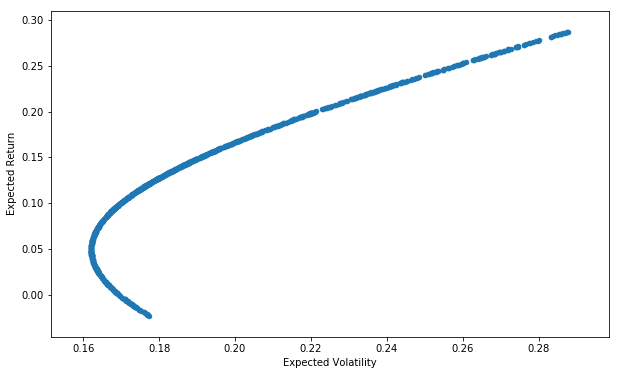

In [10]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [11]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()
data_dir = '../dataset'

for a in assets:
#     pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']
    pf_data[a] = pd.read_csv(os.path.join(data_dir, a+'.csv'), index_col=0)['Adj Close']
pf_data

,WMT,FB,BP
Date,,,
2014-01-02,78.910004,54.709999,47.980000
2014-01-03,78.650002,54.560001,47.869999
2014-01-06,78.209999,57.200001,48.000000
2014-01-07,78.449997,57.919998,48.549999
2014-01-08,77.830002,58.230000,48.730000
2014-01-09,78.089996,57.220001,48.849998
2014-01-10,78.040001,57.939999,49.200001
2014-01-13,77.489998,55.910000,48.150002
2014-01-14,77.959999,57.740002,48.340000


In [12]:
pf_returns = []
pf_volatilities = []

log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

Expected Portfolio Return:

Expected Portfolio Variance:

Expected Portfolio Volatility:

*****

In [13]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility':pf_volatilities})
portfolios

,Return,Volatility
0,0.017721,0.190860
1,0.015713,0.171634
2,0.033181,0.210219
3,-0.046573,0.161746
4,-0.041427,0.161117
5,0.005545,0.150910
6,-0.000085,0.181893
7,0.023084,0.193238
8,0.010405,0.153814
9,-0.044252,0.155838


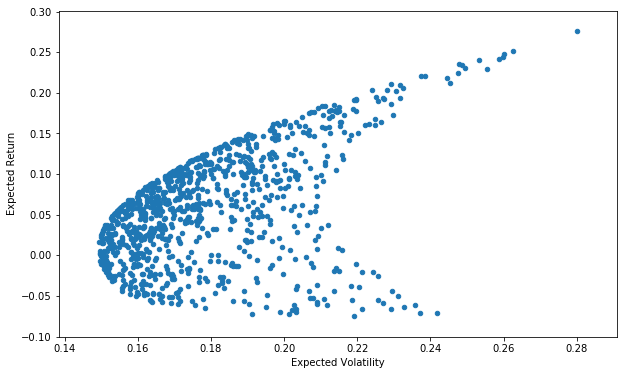

In [14]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')